# Machine Learning Coursework Part 2

**Introduction**

In part 2 we aim to apply 6 models to try and predict the target variable in our dataset. The target variable is binary, thus it is a classification problem and models were scored using accuracy and roc_auc scores.

**Contents**

-  Read data/EDA (note that Read Data and Naive model are in the same Notebook entitled '1_Read Data)
2. Naive model
3. One-hot the data
4. Logistic Regression
5. Random Forest Regression
6. KNN Regression
7. Lightgbm 
8. XGBoost
9. Ensemble

**1a. Read data/EDA**

First we combine both train.csv and test.csv into one pandas dataframe which was size 17083 x 232. The data set included both categorical and numeric variables which were stored separately as "vars_ind_categorical" and "vars_ind_num".

The 'target' variable (the variable that we are to predict) was found to have only 2 unique variables: 0 and 1 with the frequencies of 10876 and 1086 respectively as shown in the figure below. This is meant to be the probability of an airplane crash thus we assume that the values of 1 (which had a lower frequency) was the probabiliity of a crash. 

Next we check for the number of unique values for each categorical variable. The highest number was 36, which is still acceptable to one-hot the variables.The 2nd figure below shows the distribution of that particular variable

Finally we check for number of missing values, and there were no missing values except for the 5121 target values of the test.csv (obviously), and use the pickle package to create a dictionary and save the data.

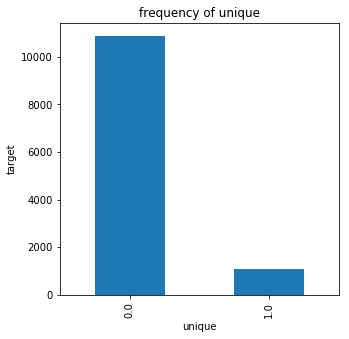

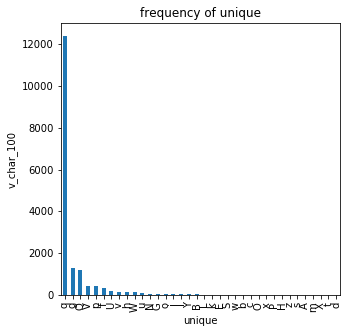


**1b. Naive model**

The mean of the target variable was found to be 0.09078749373014545. In other words this is the probability of the value of 1 occuring in the data set. Thus we hope to always predict this probability as our naive model. This resulted in a Kaggle score of 0.5.

**2. One-hot data**

Using the OneHotEncoder function from sklearn.preprocessing, we ran a loop to one-hot all the categorical variables. The most frequent value in each categorical variable was dropped, and the one-hot variables were named as categoricalvariable_X_value. For example, if variable v_char_1 had two values G and Y, one-hot process would result in 2 variables being created: v_char_1_X_G and v_char_2_X_Y. After which the more frequent variable is dropped say(G). Thus leaving only v_char_1_X_Y which would take values of 0 and 1 only. Once done, the data preparation is complete and we can move on to impllementing the models.

**2. k-Nearest Neighbours**

The k-nearest neighbors (kNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems. It is known as a non-parametric (no assumptions on the underlying data distribution),lazy learning algorithm (lack of generalization- it keeps all the training data).

The KNN algorithm assumes that similar things exist in close proximity. It works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression). To select the K that’s right for your data, we run the KNN algorithm several times with different values of K and choose the K that reduces the number of errors we encounter while maintaining the algorithm’s ability to accurately make predictions when it’s given data it hasn’t seen before.

In simple words, consider a training set that you have collected about images and their labels. We now want to predict a label for the image x. What do we do? The simplest idea is to look through the training set one by one and find the image that is closest to the image x. To do this, we have to have some sort of notion about what “close” means. This requires use of a distance metric. A distance metric is a measure of how “close” or how “far” two images. Now we have an algorithm.


In our case, we applied the KNeighborsClassifier from sklearn.neighbors since we have a classification problem. We tuned the k parameter by running a for loop with possible k numbers in range 1 to 15 and calculating the auc value for each k. We choose the best k by looking at the plot. The best k = 1 for auc=0.60512599, but choosing k=1 is not sufficient for our model. Therefore, we choose best k = 3 with auc = 0.5922859. 

![alt text](knn_plot.png "Title")

Then we fit the model on the design dataset using k=3 and predict the values for the test dataset. 

**4. Logistic Regression**

As the machine learning problem is a classification task, a linear regression is not appropriate. Thus we ran both l1 and l2 logistic regressions separately using the function "LogisticRegression()" from sklearn.linearmodel. This allowed us to toggle penalty and lambda. In "LogisticRegression()", C = 1/lambda. For example, to run an l1 logistic regression with lambda =0.1, we would type LogisticRegression(penalty = "l1", C = 10).

As usual, we instantiate, fit the model on training data and predict the model on validation data. 80% of the training data was used to train the model and 20 % of the training data was used as validation.

There were two metrics that we can possibly use for scoring how good the model is. Firstly we can use accuracy score which is how well the model fits the data, and secondly we can use auc score which calculates the area under the curve of the true positive rate against the false positive rate. They both take values between 0 and 1, with 1 being that the model is perfectly fitted.

<table style="width:100%">
  <tr>
    <td style="text-align: left">1.Baseline</td>
    <td style="text-align: left">2.Cross Validation</td> 
    <td style="text-align: left">3.Gridsearch </td>
  </tr>
    <tr>
    <td style="text-align: left">penalty = 'l2', C = 1.0
    <br>val accuracy score: 0.9192520186995325
    <br>val auc score: 0.6464906301748131
    <br> Kaggle Score: 0.85111
     <br>
     <br>penalty = 'l1', C = 1.0
    <br>val accuracy score: 0.9196770080747981
    <br>val auc score:0.6467243842655097
    </td>
    <td style="text-align: left">penalty = 'l2', C = 1.0
    <br>10 fold cross validation auc_score on design data: 0.8301530696775012
    <br>penalty = 'l1', C = 1.0
    <br>
    <br>10 fold cross validation auc_score on design data: 0.834327713670884
    </td> 
    <td style="text-align: left">Best: 0.853389 using {'C': 0.05, 'penalty': 'l1'} </td>
   <tr>
    <td style="text-align: left">From this it seems like l1 is marginally better. However to have more robust result, we apply 10 fold         cross validation using Kfold from sklearn.model_selection.</td>
    <td style="text-align: left">Before submitting to kaggle, we run a gridsearch over the parameter input C (which controls lambda), to tune the hyperparameter. This is done using GridSearchCV which finds the best model using cross-validation. We set cross-validation(cv) to 10. </td> 
    <td style="text-align: left">This auc_score was even higher, thus we expected a better Kaggle Score. Using these parameters, our Kaggle Score improved to 0.86802. </td>
  </tr>
     
  </tr>
</table>

**5. Decision Tree**

This technique is a popular alternative to the more complex neural networks method. In its simplest form, a result is determined conditional on the outcome of a pre-selected factor. This process is consequently extended to a broadened set of results which are generated based on a multitude of pre-selected factors. There are two types of decision trees, a classification tree which refers to a binary decision, and a regression tree which is a decision tree that is based on a continuous range. The classification tree type (binary decision)  was implemented for our plane crash analysis where the thresholds to decide on the binary outcome were decided based on the Gini index.
The problem with decision trees is that when dealing with multiple factors  to which we base our conclusive result, the amount of trees required increases exponentially in relation to the number of factors we are using. This causes the computation of decision trees to become excessively complex (np-hard) where it may be sometimes impossible to solve or even verify.  

As usual, in our decision tree model, we try to looking for the model with the best max depth. If the max depth is very high, this model will become very complicated and reult in overfitting. So first, we have a baseline model with max_depth=5.Then, we do cross validation to check the robust of the folds for train and test. But after drawing auc graph for val data set with different max_depth, we can see max_depth=12 is possible. However, it resulted in a lower score in Kaggle (overfitting). Finally we use GridSearch to tune the paramter and the result in kaggle is also improved.

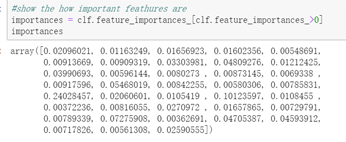
<center> The pictures below show that not all variables are important in our decision tree</center>

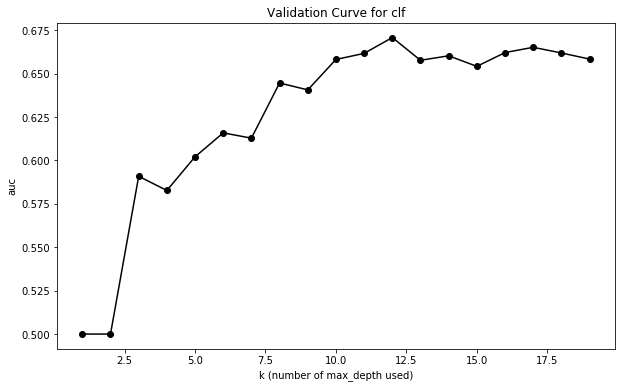

<table style="width:100%">
  <tr>
    <td style="text-align: left">1.Baseline</td>
    <td style="text-align: left">2.Max AUC </td> 
    <td style="text-align: left">3.Gridsearch </td>
  </tr>
    <tr>
    <td style="text-align: left"> max_depth=5
                  <br>    train auc: 0.6639975197751207
                  <br>    val auc: 0.6158841366172507
                  <br>    kaggle score: 0.74227
    </td>
    <td style="text-align: left">max_depth=12
                  <br>   kaggle score: 0.52753
    </td> 
    <td style="text-align: left">max_depth=6
                  <br>   kaggle score: 0.78208
    </td>
     
  </tr>
</table>

**6.Random Forest** 

The problem which a decision tree is that it could result in overfitting and high variance. A random forest solves this issue by using a collection of decision trees each on random subset of the data. The majority result of all the decisions trees in the random forest is what is decided to classify our data.

For Random Forest, we import h2o and read data in h2o form. Besides build up a basedline model, we optimize the parameter with grid search in h2o.


![alt text](import_rf.png "Title")

<center>Demonstrate that v_num_86 has a significant effect</center>

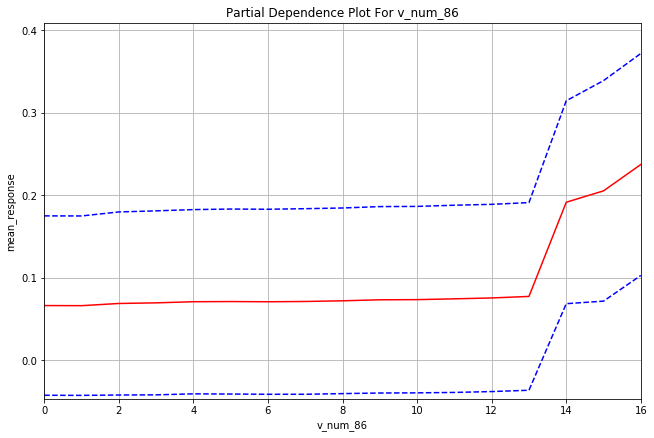
 <br> Create partial dependence plot which gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. As we can see above, the v_num_86 has positive correlation to the target (dependent variable)

Fortunately, after gridsearching, the model we use first is the best one and kaggle also gives good score (0.85673)


**7. XGBoost**

XGBoost is essentially an upgraded tree ensemble that chooses to add new trees at each new branch using gradient descent that minimizes its loss function. It seeks to create a strong classifier based on “weak” classifiers (correlation between the learners and the actual target variable is low). This method fits the new model to new residuals of the previous prediction and then minimizes the loss when adding the latest prediction. So, in the end, you are updating your model using gradient descent. This is supported for both regression and classification problems. XGBoost specifically, implements this algorithm for decision tree boosting with an additional custom regularization term in the objective function.

For our case we applied XGBoost using the xgboost package and the XGBClassifier() function, as our task is a classification task. 

<table style="width:100%">
  <tr>
    <td style="text-align: left">1.Baseline</td>
    <td style="text-align: left">2.Gridsearch</td> 
    <td style="text-align: left">3.Gridsearch with smaller grid</td>
  </tr>
    <tr>
    <td style="text-align: left">average score using 10 fold cross validation on design data: 0.921920534334722
                        <br>average roc_auc score using 10 fold cross validation on design data: 0.8713212038661784
                        <br> Kaggle Score: 0.87376                    
    </td>
    <td style="text-align: left">using settings: {'min_child_weight': 3, 'gamma' = 0, 'max_depth' = 4}.
                        <br>auc_score is 0.873310 
                        <br> highest Kaggle Score: 0.87807
    </td> 
    <td style="text-align: left"> The auc_score imprveod to 0.874784. 
                        <br> the Kaggle Score was lower at 0.875802.
        </td>
   <tr>
    <td style="text-align: left">This was a relatively high score, however we continue to proceed with hyperparameter optimization</td>
    <td style="text-align: left">After which we tried to run grid search over those three parameters simultaneuously with smaller grids</td> 
    <td style="text-align: left">An explanation could be that this setting over-fitted the design data; but did not do well for the test data. Nevertheless, it is still a relatively good result</td>
  </tr>
     
  </tr>
</table>

**9. LightGBM**

LightGBM a modified version of XG Boost which assumedly runs faster and arguably more accurate because it uses histogram splits, instead of running through the best way to split the decision tree. 

The method for lightgbm is similar to that of Xgboost. The difference is we import the lighgbm as one of our packages sor it has its dataframe. Besides, mainly tune three parameters:'learning_rate', 'max_depth'and 'min_data_in_leaf' to get best auc result. 

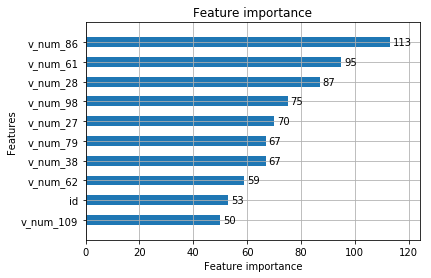
<center>Once again, we see v_num_86 plays an important role.In pratice, we should retain the important features and drop less ones to run model again which is a good way to fit model more accurately. </center>

<table style="width:100%">
  <tr>
    <td style="text-align: left">1.Baseline</td>
    <td style="text-align: left">2.Gridsearch</td> 
    <td style="text-align: left">3.Gridsearch with smaller grids</td>
  </tr>
    <tr>
    <td style="text-align: left">train auc: 0.8616825075892571
                        <br> val auc: 0.8327494107690486
                        <br> Kaggle Score: 0.83833                    
    </td>
    <td style="text-align: left"> <br> Kaggle Score: 0.86897
    </td> 
    <td style="text-align: left"> The auc_score imprveod to 0.883619. 
                        <br> the Kaggle Score was higest at 0.87285
        </td>
 
     
  </tr>
</table>

**10. Ensemble using stacking**

In this notebook, we implement an ensemble using the predictions of the 7 models as features, and running Xgboost and Logistic Regression. The results are as follows:

XGboost ensemble<br>
10 fold cross validation, post grid search, auc_score: 0.993996<br>
Kaggle Score: 0.78648

Logistic Regression ensemble<br>
10 fold cross validation, post grid search, auc_score: 0.984980<br>
Kaggle Score: 0.7702

This could is likely due to overfitting. Furthermore, certain models may have high correlation, and could be given different weights before carrying out the ensemble

Following this we created a correlation matrix of our ensemble dataframe. As seen below, random forest, XGB and lightGBM were highly correlated; elastic net and logistic regression were highly correlated(not surprisingly as elastic net utilizes l1 and l2 log regressions). Thus we ran another ensemble only choosing the highest Kaggle Scoring among the correlated groups, and ended up running XGBoost again over the ensemble containing XGB, logistic regression, decision tree and KNN. 

XGboost ensemble after dropping correlated features<br>
10 fold cross validation, post grid search, auc_score: 0.9809266<br>
Kaggle Score: 0.77169

Unforunately this method did not improve the Kaggle Score.

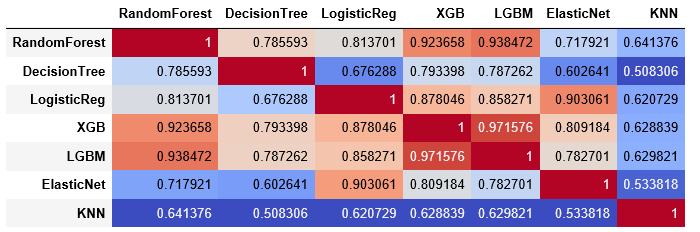

**11. Ensemble using average**

Next we attempted to take the average of 3 tuned xgboost models. This resulted in our best Kaggle Score of 0.87938.

**12. Conclusion**

Theoretically, an ensemble should give the best result, and technically it did however it was using the average method yielded better results compared to stacking. 

Ideally we could improve the models further by the following methods:
1. Dropping features that have no predictive power. Feature importance can be more robustly determined by shuffling the important features and running the models and obtain the loss in auc_score (if the loss is large then that feature is important)
2. Running a more comprehensive grid-search for each model; initially we had attempted this but the computer crashed..
3. Improving the stacking ensemble by taking averages or giving weights to correlated variables, instead of dropping them

Better interpretability may be accomplished if the variables are not anonymised and we could ascertain some real-world relationships between the variables.

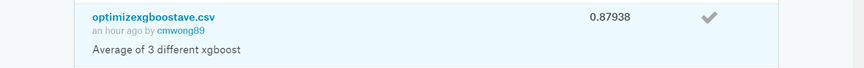

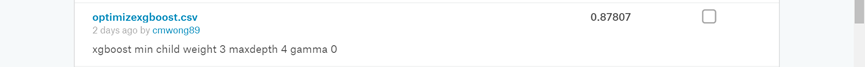

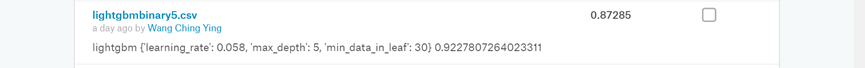

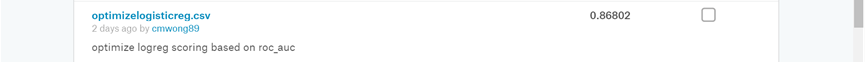

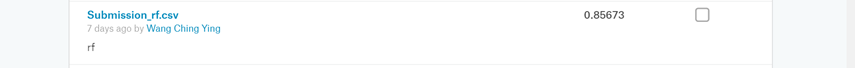

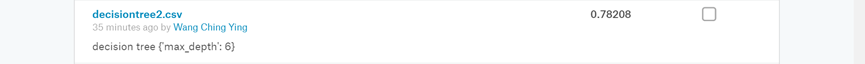

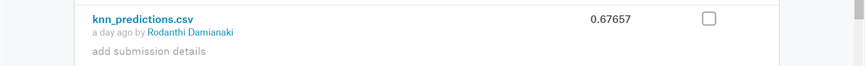

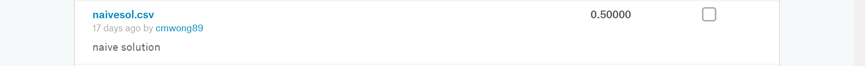